In [1]:
# PICKLES LIBRARY

In [2]:
from spextra import SpecLibrary, Spextrum
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

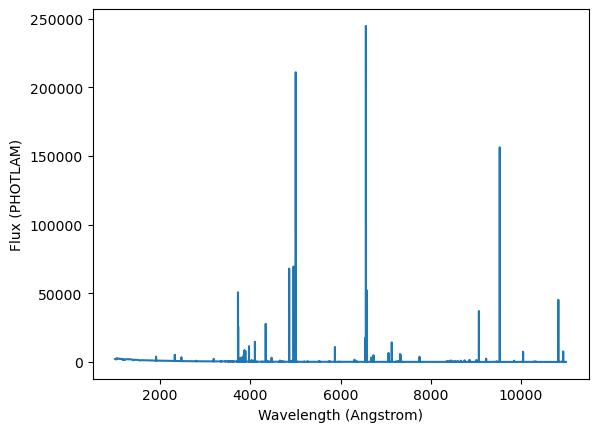

In [3]:
# RETRIEVE DATA FROM LIBRARY
lib = "nebulae"
spectra = "orion"

# NEEDS TO BE FORMATTED AS "[library]/[spectra]"
retrieve = lib + "/" + spectra
sp = Spextrum(retrieve)
sp.plot()

In [4]:
# RETRIEVE WAVELENGTH AND FLUX

wlA = np.array( sp.waveset )
flux = np.array( sp(wlA, flux_unit="PHOTLAM") )

print(wlA)
print(flux)

[ 1000.   1000.5  1001.  ... 10999.  10999.5 11000. ]
[2165.44542929 2180.17730053 2194.92299312 ...   24.33334137   24.33339475
   24.33350568]


In [5]:
def plotCurve(given_wl, given_flux):

    wlnm = given_wl
    P = given_flux

    # FOR TESTING PURPOSES
    filter_low = 2000
    filter_high = 5000

    p_max = np.max(P)
    wl_max = np.max(wlnm)

    plt.figure(figsize=(8, 6))
    plt.plot(wlnm, P,label='Stellar Spectrum',color='y')

    plt.fill_between(wlnm, P, color = 'yellow', alpha = 0.3,label = 'Stellar emission')

    plt.axvline(x=filter_low, color='r', linestyle='--', label='filter cut on')
    plt.axvline(x=filter_high, color='b', linestyle='--', label='filter cut off')

    plt.fill_betweenx(y=np.linspace(min(P), max(P)+1*10**14), x1=filter_low, x2=filter_high, color='lightblue', alpha=0.4, label='filter band pass')

    plt.title('Filtered Stellar Spectrum')
    plt.xlabel('Wavelength (Angstrom)')
    plt.ylabel('Power Density (PHOTLAM)')
    plt.xlim(0,wl_max * 1.1)
    plt.ylim(0,p_max * 1.1)

    plt.legend()
    plt.grid(True)
    plt.show()

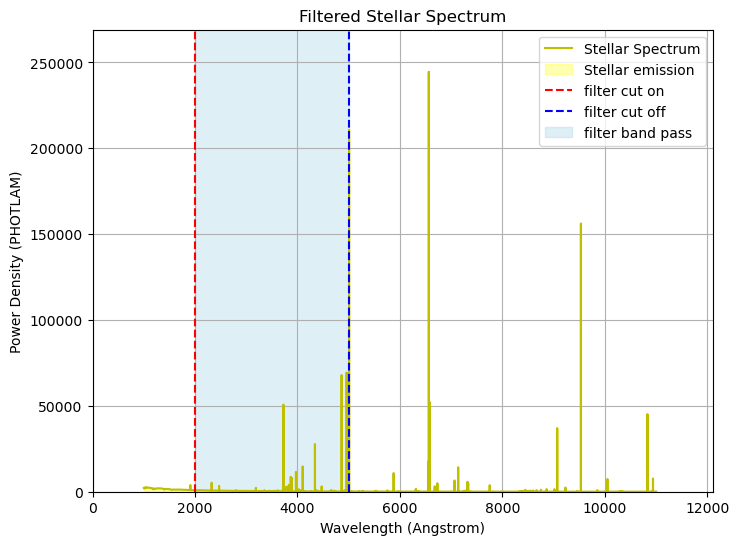

In [6]:
plotCurve(wlA, flux)

In [11]:
import spextra
from spextra import Passband

Passband.DEFAULT_FILTERS

{'U': 'etc/U',
 'B': 'etc/B',
 'V': 'etc/V',
 'R': 'etc/R',
 'I': 'etc/I',
 'Z': 'etc/Z',
 'Y': 'etc/Y',
 'J': 'etc/J',
 'H': 'etc/H',
 'K': 'etc/K',
 'Ks': '2MASS/2MASS.Ks',
 'L': 'etc/L',
 'M': 'etc/M',
 'N': 'etc/N',
 'Q': 'etc/Q',
 'u': 'SLOAN/SDSS.u',
 'g': 'SLOAN/SDSS.g',
 'r': 'SLOAN/SDSS.r',
 'i': 'SLOAN/SDSS.i',
 'z': 'SLOAN/SDSS.z',
 'HAlpha': 'Gemini/GMOS-N.Ha',
 'PaBeta': 'Gemini/NIRI.PaBeta-G0221',
 'BrGamma': 'Gemini/NIRI.BrG-G0218',
 'FUV': 'GALEX/GALEX.FUV',
 'NUV': 'GALEX/GALEX.NUV',
 'F435W': 'HST/ACS_WFC.F435W',
 'F475W': 'HST/ACS_WFC.F475W',
 'F606W': 'HST/ACS_WFC.F606W',
 'F775W': 'HST/ACS_WFC.F775W',
 'F814W': 'HST/ACS_WFC.F814W',
 'F850LP': 'HST/ACS_WFC.F850LP',
 'F105W': 'HST/WFC3_IR.F105W',
 'F110W': 'HST/WFC3_IR.F110W',
 'F125W': 'HST/WFC3_IR.F125W',
 'F140W': 'HST/WFC3_IR.F140W',
 'F160W': 'HST/WFC3_IR.F160W',
 'ch1': 'Spitzer/IRAC.I1',
 'ch2': 'Spitzer/IRAC.I2',
 'ch3': 'Spitzer/IRAC.I3',
 'ch4': 'Spitzer/IRAC.I4',
 'W1': 'WISE/WISE.W1',
 'W2': 'WISE/WISE.W2

In [27]:
v = Passband('V')
v.equivwidth()
v.fwhm()
v.tpeak()

<Quantity 0.8967>

927.8418457904887 Angstrom
0.3613


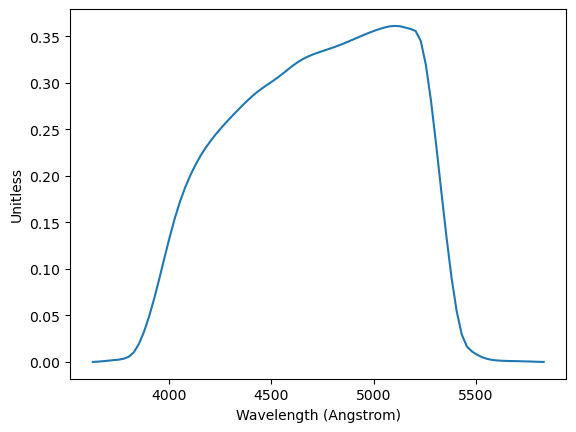

In [31]:
g = Passband('g')
g.equivwidth()
print(g.fwhm())
print(g.tpeak())
g.plot()

0.98


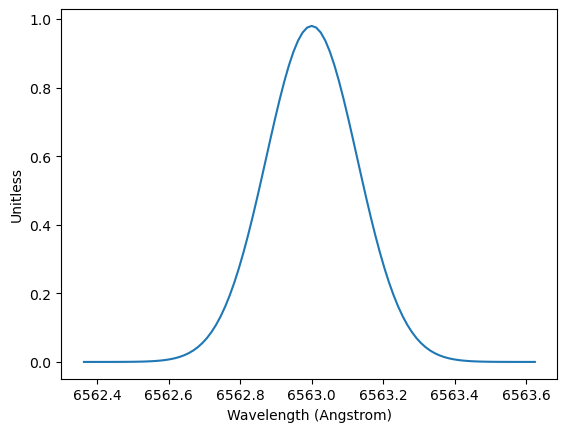

In [33]:
halpha = Passband.gaussian(6563, 0.3, 0.98)
print(halpha.tpeak())
halpha.plot()